# Анализ МРТ данных 

In [15]:
import rarfile
import re
import shutil
import os
import glob
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import phik
import networkx as nx

#  Предобработка данных

## Предобработка архива

In [16]:
rar_path = '/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses.rar'
extract_to = '/Users/dana/Desktop/вшэ/2 курс/курсач/данные'
extracted_folder = '/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses'

# Если папка уже существует, удаляем её
if os.path.exists(extracted_folder):
    shutil.rmtree(extracted_folder)

with rarfile.RarFile(rar_path) as rf:
    rf.extractall(path=extract_to)

print(f"Файлы извлечены в {extract_to}")

BadRarFile: Corrupt file - CRC check failed: TimeCourses/sub-OAS30762/sub-OAS30762_run1_timecourses.mat - exp=2587894035 got=21064832

Составим список названий столбцов, который будем прикреплять к таблицам:

In [79]:
labels_path = "/Users/dana/Desktop/вшэ/2 курс/курсач/данные/aal_labels.rtf"

with open(labels_path, "r", encoding="utf-8") as file:
    text = file.read()

matches = re.findall(r"(\d+)\s+([\w\d_]+)\s+\1", text)
brain_regions = [match[1] for match in matches]

print([(i+1, brain_regions[i]) for i in range(len(brain_regions))])
print(f"Количество областей мозга: {len(brain_regions)}")

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L'), (6, 'Frontal_Mid_2_R'), (7, 'Frontal_Inf_Oper_L'), (8, 'Frontal_Inf_Oper_R'), (9, 'Frontal_Inf_Tri_L'), (10, 'Frontal_Inf_Tri_R'), (11, 'Frontal_Inf_Orb_2_L'), (12, 'Frontal_Inf_Orb_2_R'), (13, 'Rolandic_Oper_L'), (14, 'Rolandic_Oper_R'), (15, 'Supp_Motor_Area_L'), (16, 'Supp_Motor_Area_R'), (17, 'Olfactory_L'), (18, 'Olfactory_R'), (19, 'Frontal_Sup_Medial_L'), (20, 'Frontal_Sup_Medial_R'), (21, 'Frontal_Med_Orb_L'), (22, 'Frontal_Med_Orb_R'), (23, 'Rectus_L'), (24, 'Rectus_R'), (25, 'OFCmed_L'), (26, 'OFCmed_R'), (27, 'OFCant_L'), (28, 'OFCant_R'), (29, 'OFCpost_L'), (30, 'OFCpost_R'), (31, 'OFClat_L'), (32, 'OFClat_R'), (33, 'Insula_L'), (34, 'Insula_R'), (35, 'Cingulate_Mid_L'), (36, 'Cingulate_Mid_R'), (37, 'Cingulate_Post_L'), (38, 'Cingulate_Post_R'), (39, 'Hippocampus_L'), (40, 'Hippocampus_R'), (41, 'ParaHippocampal_L'), (42, 'ParaHippocampal_R'), (43, 'Amygdala_L

## Предобработка данных респондентов

Для каждого человека

1) объединяем 2 файла с временными рядами

2) строим таблицу корреляций и сохраняем ее

In [ ]:
# Корневая директория с папками person_n
root_dir = "/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses"

# Получаем список всех папок вида /data/person_n/
person_dirs = [d for d in sorted(os.listdir(root_dir)) if os.path.isdir(os.path.join(root_dir, d))]

for person in person_dirs:
    person_path = os.path.join(root_dir, person)
    output_file = os.path.join(person_path, "full_data.csv")
    corr_matrix_file = os.path.join(person_path, "correlation_matrix.csv") 

    if os.path.exists(output_file) and os.path.exists(corr_matrix_file):
        print(f"Пропускаем {person}, файлы уже существуют.")
        continue

    # Ищем все CSV-файлы в папке person_n
    csv_files = sorted(glob.glob(os.path.join(person_path, "*.csv")))  # Сортируем по алфавиту
    if not csv_files:
        continue

    # Загружаем и объединяем все CSV-файлы, подписываем слолбцы и сохраняем
    df_list = [pd.read_csv(file, header=None) for file in csv_files]
    df = pd.concat(df_list, ignore_index=True)
    df.columns = brain_regions
    df.to_csv(output_file, index=False)
    print(f"Объединенный файл сохранен: {output_file}") 

    # Строим матрицу корреляций
    corr_matrix = df.corr()
    corr_matrix.to_csv(corr_matrix_file)
    print(f"Матрица корреляций сохранена: {corr_matrix_file}")


Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30002/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30002/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30003/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30003/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30004/full_data.csv
Матрица корреляций сохранена: /Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30004/correlation_matrix.csv
Объединенный файл сохранен: /Users/dana/Desktop/вшэ/2 курс/к

## Обработка данных на примере первого респондента - создание графа по матрице корреляций и визуализация промежуточных данных

### Визуализация матрицы корреляций для 1 человека

In [31]:
#лк-ад версия таблицы

df = pd.read_csv("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
ph = df.phik_matrix(njobs=1)

plt.figure(figsize=(166,166))
# sns.heatmap(ph, cmap="Blues", annot=True)
sns.heatmap(ph, cmap="coolwarm", linewidths=0.5)

interval columns not set, guessing: ['Precentral_L', 'Precentral_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Rolandic_Oper_L', 'Rolandic_Oper_R', 'Supp_Motor_Area_L', 'Supp_Motor_Area_R', 'Olfactory_L', 'Olfactory_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Rectus_L', 'Rectus_R', 'OFCmed_L', 'OFCmed_R', 'OFCant_L', 'OFCant_R', 'OFCpost_L', 'OFCpost_R', 'OFClat_L', 'OFClat_R', 'Insula_L', 'Insula_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Hippocampus_L', 'Hippocampus_R', 'ParaHippocampal_L', 'ParaHippocampal_R', 'Amygdala_L', 'Amygdala_R', 'Calcarine_L', 'Calcarine_R', 'Cuneus_L', 'Cuneus_R', 'Lingual_L', 'Lingual_R', 'Occipital_Sup_L', 'Occipital_Sup_R', 'Occipital_Mid_L', 'Occipital_Mid_R', 'Occipital_Inf_L', 'Occipital_Inf_R', '

<Axes: >

### Cоздание графа по матрице корреляций

In [32]:
def build_mst_graph(corr_matrix_file, density_target=0.05):
    df_corr = pd.read_csv(corr_matrix_file, index_col=0)
    N = df_corr.shape[0]
    node_labels = list(df_corr.index)

    G = nx.Graph()

    for i in range(N):
        for j in range(i + 1, N):
            w = abs(df_corr.iloc[i, j])
            G.add_edge(node_labels[i], node_labels[j], weight=w)


    # Создаем MST (остовное дерево)
    mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", data=True))


    # Ограничиваем плотность графа
    E_max = int(density_target * N * (N - 1) / 2)
    sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
    final_edges = [(u, v, data['weight']) for u, v, data in mst_edges]

    for u, v, data in sorted_edges:
        if len(final_edges) >= E_max:
            break
        final_edges.append((u, v, data['weight']))
    

    G_final = nx.Graph()
    G_final.add_weighted_edges_from(final_edges)

    return G_final

### Визуализируем граф

In [33]:
graph = build_mst_graph("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30001/correlation_matrix.csv")
print(f"Число рёбер в графе: {graph.number_of_edges()}")
print(f"Названия вершин: {list(graph.nodes)[:5]}")

Число рёбер в графе: 684
Названия вершин: ['Frontal_Inf_Tri_L', 'Olfactory_R', 'Frontal_Inf_Orb_2_R', 'Raphe_D', 'OFCpost_L']


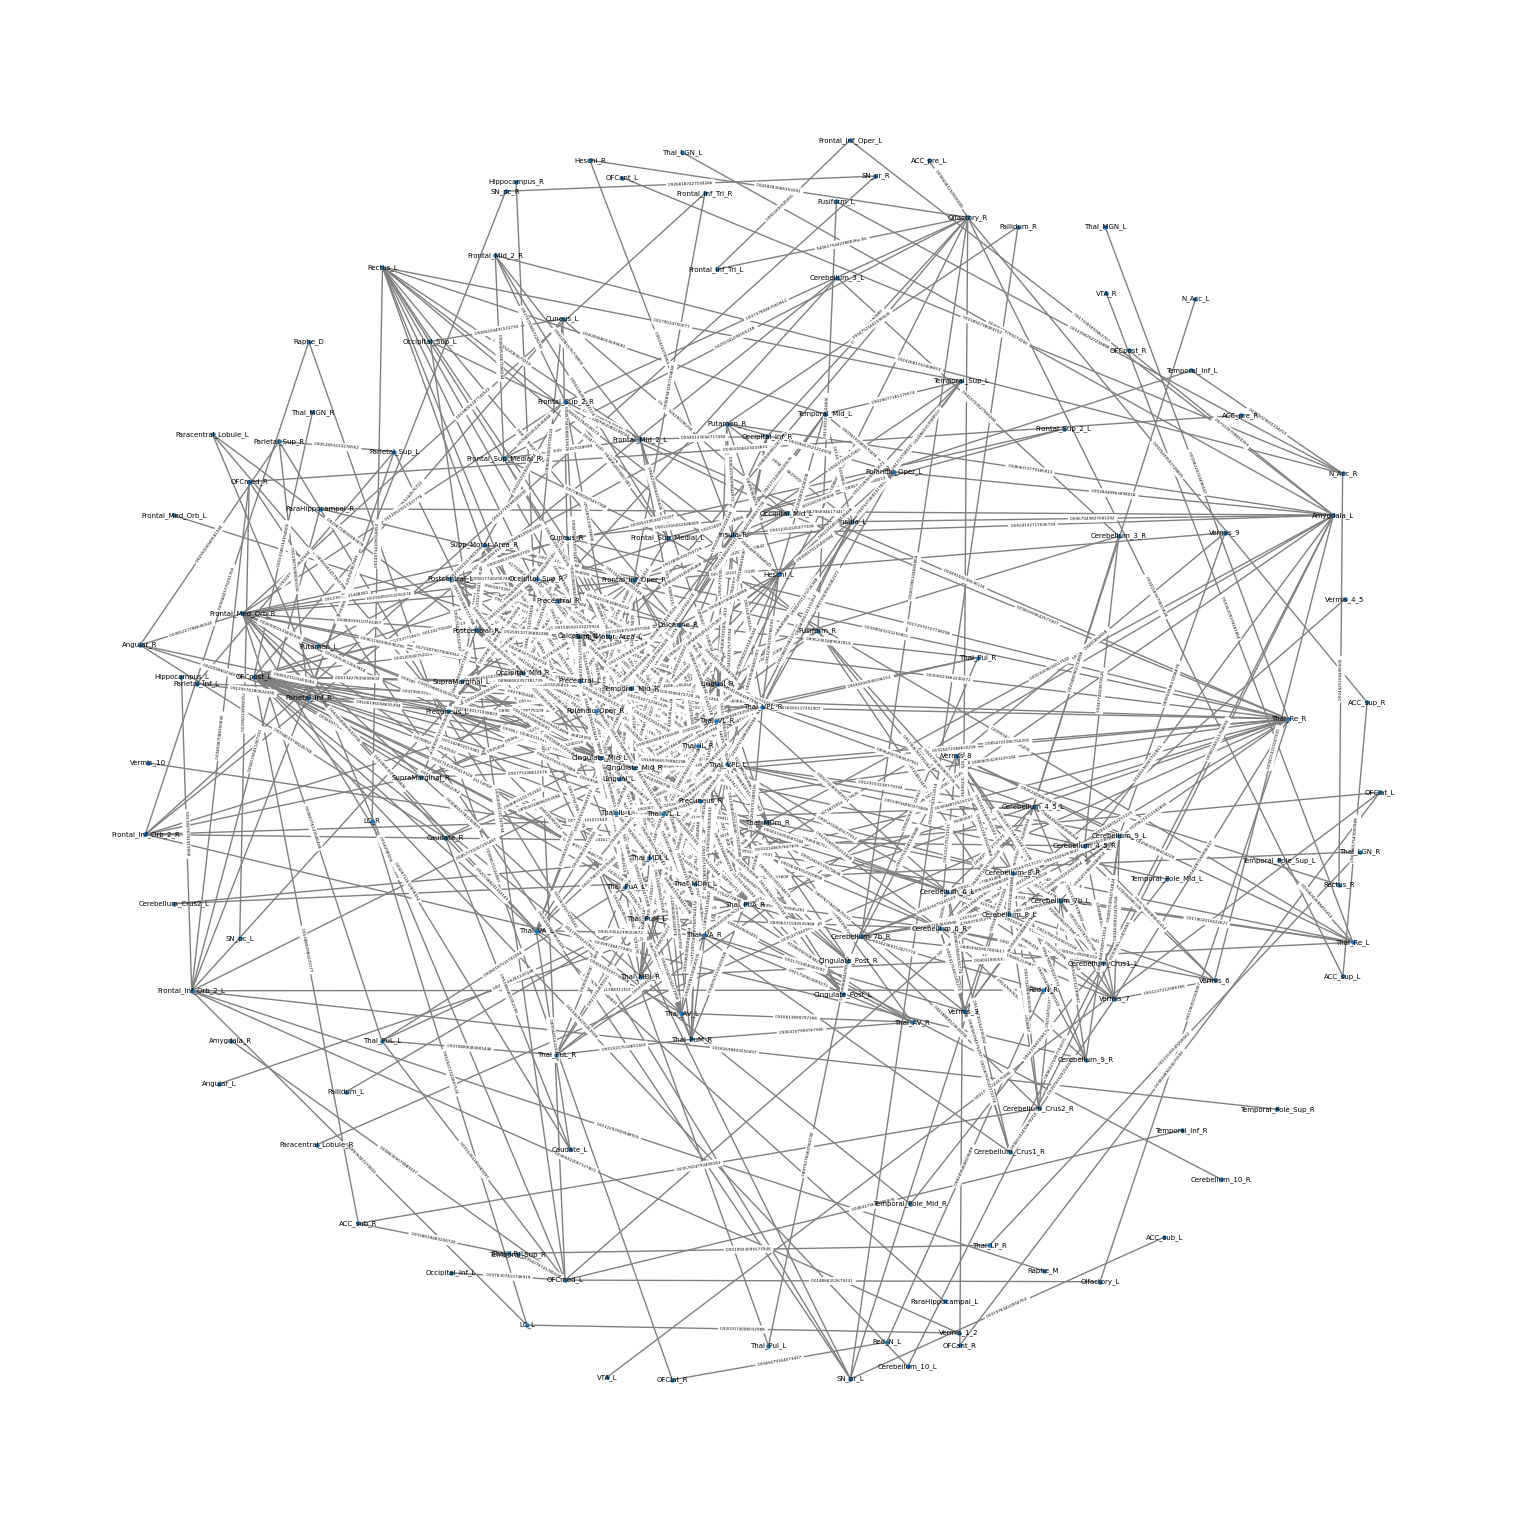

In [34]:
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(graph, weight='weight', k=0.5)
edge_labels = nx.get_edge_attributes(graph, 'weight')
nx.draw(graph, pos, with_labels=True, node_size=5, edge_color="gray", font_size=5)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=3)
plt.show()

### Визуализация на мозге:

1. Предобработка атласа AAL-3 (Automated Anatomical Labeling 3):

In [77]:
import nibabel as nib

aal3_img = nib.load("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/AAL3/AAL3v1.nii.gz") 
aal3_data = aal3_img.get_fdata()

with open("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/AAL3/AAL3v1.nii.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

aal3_dict = {}
for line in lines:
    parts = line.strip().split()
    if len(parts) >= 3:
        region_id = int(parts[0])
        region_name = " ".join(parts[1:-1])
        aal3_dict[region_id] = region_name

print(list(aal3_dict.items())[:5])

region_coordinates = {}
for region_id, region_name in aal3_dict.items():
    indices = np.argwhere(aal3_data == region_id)
    if len(indices) > 0:
        centroid = np.mean(indices, axis=0)
        region_coordinates[region_name] = centroid

df_coordinates = pd.DataFrame(region_coordinates).T
df_coordinates.columns = ["X", "Y", "Z"]

print(df_coordinates.head())

[(1, 'Precentral_L'), (2, 'Precentral_R'), (3, 'Frontal_Sup_2_L'), (4, 'Frontal_Sup_2_R'), (5, 'Frontal_Mid_2_L')]
                         X          Y          Z
Precentral_L     64.465116  59.519285  60.820193
Precentral_R     24.449571  58.225081  61.404910
Frontal_Sup_2_L  55.083984  80.977618  53.618686
Frontal_Sup_2_R  33.724346  79.596371  54.671869
Frontal_Mid_2_L  62.763479  79.436432  50.968937


2. Связываем координаты областей из внешнего ресурса с нашики областями и визуализируем

In [83]:
# Оставляем только совпадающие области
filtered_coordinates = df_coordinates.loc[df_coordinates.index.intersection(brain_regions)]

print(filtered_coordinates)

                         X          Y          Z
Precentral_L     64.465116  59.519285  60.820193
Precentral_R     24.449571  58.225081  61.404910
Frontal_Sup_2_L  55.083984  80.977618  53.618686
Frontal_Sup_2_R  33.724346  79.596371  54.671869
Frontal_Mid_2_L  62.763479  79.436432  50.968937
...                    ...        ...        ...
Red_N_R          42.034483  53.258621  30.672414
LC_L             47.000000  45.600000  23.000000
LC_R             42.000000  45.400000  22.000000
Raphe_D          44.611111  49.500000  30.777778
Raphe_M          45.000000  47.833333  25.000000

[166 rows x 3 columns]


In [93]:
import plotly.graph_objects as go

x_nodes = filtered_coordinates["X"].values
y_nodes = filtered_coordinates["Y"].values
z_nodes = filtered_coordinates["Z"].values
node_names = filtered_coordinates.index.tolist()

node_trace = go.Scatter3d(
    x=x_nodes, y=y_nodes, z=z_nodes,
    mode='markers+text',
    marker=dict(size=5, color='red'),
    text=node_names
)

edge_traces = []
for edge in graph.edges:
    x0, y0, z0 = filtered_coordinates.loc[edge[0]]
    x1, y1, z1 = filtered_coordinates.loc[edge[1]]
    
    edge_trace = go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines',
        line=dict(width=1, color='blue')
    )
    edge_traces.append(edge_trace)

fig = go.Figure(data=[node_trace] + edge_traces)
fig.update_layout(
    title="3D Brain Connectivity",
    scene=dict(
        xaxis=dict(visible=False),
        yaxis=dict(visible=False),
        zaxis=dict(visible=False)
    )
)

fig.show(renderer="browser")

# Кривизны Риччи

### На примере 1 респондента считаем кривизну Формана - Риччи

Для каждой вершины посчитаем дискретную кривизну Риччи

In [60]:
# Функция для вычисления кривизны Формана-Риччи для каждого ребра
def compute_forman_ricci_edges(G):
    ricci_curvatures = {}
    
    for u, v, data in G.edges(data=True):
        w_e = data['weight']
        w_u = len(list(G.neighbors(u)))
        w_v = len(list(G.neighbors(v)))

        sum_neighbors = 0.0
        for e in G.edges(u):
            if e != (u, v):
                sum_neighbors += G[u][e[1]]['weight']  / np.sqrt(w_e * G[u][e[1]]['weight'])
        for e in G.edges(v):
            if e != (u, v):
                sum_neighbors += G[v][e[1]]['weight'] / np.sqrt(w_e * G[v][e[1]]['weight'])

        ricci_curvature = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
        ricci_curvatures[(u, v)] = ricci_curvature

        if ricci_curvature==None:
            print(u, v, data, w_e, w_u, w_v, sum_neighbors)
    return ricci_curvatures

ricci_curvatures = compute_forman_ricci_edges(graph)
for (u, v), curvature in ricci_curvatures.items():
    graph[u][v]['ricci_curvature'] = curvature

print(ricci_curvatures)

{('Frontal_Inf_Tri_L', 'Olfactory_R'): np.float64(13.991511595849703), ('Frontal_Inf_Tri_L', 'Frontal_Inf_Oper_L'): np.float64(2.914009925727137), ('Olfactory_R', 'ACC_sup_R'): np.float64(13.835292589969692), ('Olfactory_R', 'Frontal_Sup_2_R'): np.float64(20.256018404640088), ('Olfactory_R', 'ACC_pre_L'): np.float64(12.836207125076815), ('Olfactory_R', 'Occipital_Inf_R'): np.float64(16.44649928514328), ('Olfactory_R', 'OFCant_R'): np.float64(13.781121323714375), ('Olfactory_R', 'ACC_sup_L'): np.float64(13.569978952470542), ('Olfactory_R', 'Frontal_Sup_Medial_R'): np.float64(16.86444276119737), ('Olfactory_R', 'Cerebellum_7b_R'): np.float64(18.292875342893), ('Olfactory_R', 'Heschl_R'): np.float64(13.426411738865413), ('Olfactory_R', 'Precentral_L'): np.float64(29.011050610800407), ('Olfactory_R', 'Thal_VL_R'): np.float64(32.45707344766209), ('Frontal_Inf_Orb_2_R', 'Raphe_D'): np.float64(9.972737399967372), ('Frontal_Inf_Orb_2_R', 'Cerebellum_3_L'): np.float64(10.916658072266786), ('Fro

In [48]:
def compute_forman_ricci_nodes(G):
    """
    Вычисляет кривизну Формана-Риччи для каждой вершины как сумму кривизн её инцидентных рёбер.
    """
    ricci_edges = compute_forman_ricci_edges(G)  # Сначала считаем кривизну для рёбер
    ricci_nodes = {node: 0 for node in G.nodes()}  # Инициализируем словарь кривизн вершин

    # Складываем кривизны рёбер для каждой вершины
    for (u, v), ricci in ricci_edges.items():
        ricci_nodes[u] += ricci
        ricci_nodes[v] += ricci

    return ricci_nodes

ricci_nodes = compute_forman_ricci_nodes(graph)
nx.set_node_attributes(graph, ricci_nodes, "ricci_curvature")

print([(node, graph.nodes[node]['ricci_curvature']) for node in graph.nodes()])

[('Frontal_Inf_Tri_L', np.float64(16.90552152157684)), ('Olfactory_R', np.float64(214.76848317828276)), ('Frontal_Inf_Orb_2_R', np.float64(97.68173597352005)), ('Raphe_D', np.float64(13.958186359230522)), ('OFCpost_L', np.float64(915.0629119527349)), ('Thal_AV_R', np.float64(53.23893854230211)), ('Amygdala_L', np.float64(309.57871027467075)), ('Cerebellum_10_L', np.float64(44.466968990981414)), ('Cerebellum_3_L', np.float64(28.632618499906638)), ('OFCmed_L', np.float64(116.78890076901983)), ('Vermis_4_5', np.float64(10.954827370462114)), ('Thal_PuL_L', np.float64(55.32993469074127)), ('ACC_sub_L', np.float64(6.972429860547962)), ('SN_pr_L', np.float64(50.922275131419106)), ('Thal_IL_R', np.float64(147.00337301036552)), ('Pallidum_R', np.float64(11.307761992135834)), ('Vermis_10', np.float64(8.943586729556639)), ('Thal_Re_L', np.float64(110.34932771819992)), ('Thal_MDm_R', np.float64(122.91293719988263)), ('Temporal_Inf_L', np.float64(34.47077218819999)), ('N_Acc_R', np.float64(36.06725

In [50]:
sorted_nodes = sorted(graph.nodes())
ricci_vector = np.array([graph.nodes[node]['ricci_curvature'] for node in sorted_nodes])

print("Всего вершин:", len(sorted_nodes))
print("Отсортированные вершины:", sorted_nodes)
print("Вектор кривизн:", ricci_vector)

Всего вершин: 166
Отсортированные вершины: ['ACC_pre_L', 'ACC_pre_R', 'ACC_sub_L', 'ACC_sub_R', 'ACC_sup_L', 'ACC_sup_R', 'Amygdala_L', 'Amygdala_R', 'Angular_L', 'Angular_R', 'Calcarine_L', 'Calcarine_R', 'Caudate_L', 'Caudate_R', 'Cerebellum_10_L', 'Cerebellum_10_R', 'Cerebellum_3_L', 'Cerebellum_3_R', 'Cerebellum_4_5_L', 'Cerebellum_4_5_R', 'Cerebellum_6_L', 'Cerebellum_6_R', 'Cerebellum_7b_L', 'Cerebellum_7b_R', 'Cerebellum_8_L', 'Cerebellum_8_R', 'Cerebellum_9_L', 'Cerebellum_9_R', 'Cerebellum_Crus1_L', 'Cerebellum_Crus1_R', 'Cerebellum_Crus2_L', 'Cerebellum_Crus2_R', 'Cingulate_Mid_L', 'Cingulate_Mid_R', 'Cingulate_Post_L', 'Cingulate_Post_R', 'Cuneus_L', 'Cuneus_R', 'Frontal_Inf_Oper_L', 'Frontal_Inf_Oper_R', 'Frontal_Inf_Orb_2_L', 'Frontal_Inf_Orb_2_R', 'Frontal_Inf_Tri_L', 'Frontal_Inf_Tri_R', 'Frontal_Med_Orb_L', 'Frontal_Med_Orb_R', 'Frontal_Mid_2_L', 'Frontal_Mid_2_R', 'Frontal_Sup_2_L', 'Frontal_Sup_2_R', 'Frontal_Sup_Medial_L', 'Frontal_Sup_Medial_R', 'Fusiform_L', 'Fusif

### Создаем класс Person и систематизируем информацию по всем респондентам

In [54]:
class Person:
    """
    Класс для хранения информации о человеке

    :param person_id: Уникальный идентификатор человека
    :param status: Статус (здоровый или больной), по умолчанию здоровый.
    :param data_file: Путь к файлу с объединённой информацией (CSV)
    :param corr_matrix_file: Путь к файлу с матрицей корреляций (CSV)
    :param graph: Граф корреляций (объект networkx.Graph)
    :param graph: Вектор значений кривизны (объект np.array)
    """
    def __init__(self, person_id, data_file, corr_matrix_file, status='healthy'):
        self.person_id = person_id
        self.status = status
        self.data_file = data_file
        self.corr_matrix_file = corr_matrix_file
        self.graph = self.build_graph(self.corr_matrix_file)
        self.ricci_vector = self.compute_ricci_vector()


    def __compute_forman_ricci_edges(self, G):
        ricci_curvatures = {}
        
        for u, v, data in G.edges(data=True):
            w_e = data['weight']
            w_u = len(list(G.neighbors(u)))
            w_v = len(list(G.neighbors(v)))

            sum_neighbors = 0.0
            for neighbor in G.neighbors(u):
                if neighbor != v:
                    sum_neighbors += G[u][neighbor]['weight'] / np.sqrt(w_e * G[u][neighbor]['weight'])
            for neighbor in G.neighbors(v):
                if neighbor != u:
                    sum_neighbors += G[v][neighbor]['weight'] 

            ricci_curvature = w_e * (w_u / w_e + w_v / w_e - sum_neighbors)
            ricci_curvatures[(u, v)] = ricci_curvature
        
        return ricci_curvatures

    def __compute_forman_ricci_nodes(self, G):
        ricci_edges = self.__compute_forman_ricci_edges(G)
        ricci_nodes = {node: 0 for node in G.nodes()}

        for (u, v), ricci in ricci_edges.items():
            ricci_nodes[u] += ricci
            ricci_nodes[v] += ricci

        return ricci_nodes

    def build_graph(self, corr_matrix_file, density_target=0.05):
        df_corr = pd.read_csv(corr_matrix_file, index_col=0)
        N = df_corr.shape[0]
        node_labels = list(df_corr.index)

        G = nx.Graph()

        for i in range(N):
            for j in range(i + 1, N):
                w = abs(df_corr.iloc[i, j])
                G.add_edge(node_labels[i], node_labels[j], weight=w)

        mst_edges = list(nx.minimum_spanning_edges(G, algorithm="kruskal", data=True))

        E_max = int(density_target * N * (N - 1) / 2)
        sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)
        final_edges = [(u, v, data['weight']) for u, v, data in mst_edges]

        for u, v, data in sorted_edges:
            if len(final_edges) >= E_max:
                break
            final_edges.append((u, v, data['weight']))

        G_final = nx.Graph()
        G_final.add_weighted_edges_from(final_edges)

        ricci_curvatures = self.__compute_forman_ricci_edges(G_final)
        for (u, v), curvature in ricci_curvatures.items():
            G_final[u][v]['ricci_curvature'] = curvature
        ricci_nodes = self.__compute_forman_ricci_nodes(G_final)
        nx.set_node_attributes(G_final, ricci_nodes, "ricci_curvature")

        return G_final 

    def compute_ricci_vector(self):
        sorted_nodes = sorted(self.graph.nodes())
        return np.array([self.graph.nodes[node]['ricci_curvature'] for node in sorted_nodes])

    def __repr__(self):
        return f"PersonGraph(id={self.person_id}, status={self.status}, nodes={len(self.graph.nodes)}, edges={len(self.graph.edges)})"


Теперь пробежимся по всем людям и вычислим все нужные нам данные для каждого

In [73]:
from pathlib import Path

data_dir = Path("/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses")

persons = []
incorrect = []
incorrect_count = 0

for idx, person_folder in enumerate(sorted(data_dir.iterdir())):
    corr_matrix_file = person_folder / "correlation_matrix.csv"
    full_data_file = person_folder / "full_data.csv"

    if corr_matrix_file.exists() and full_data_file.exists():
        df_full = pd.read_csv(full_data_file, header=None)
        if df_full.shape[0] > 1 and pd.isna(df_full.iloc[1, 0]) or str(df_full.iloc[1, 0]).strip() in {"0", "0.0"}:
                incorrect_count += 1
                incorrect.append((idx, person_folder))
                continue

        new_person = Person(
            person_id=idx,
            data_file=str(full_data_file),
            corr_matrix_file=str(corr_matrix_file),
            status='healthy'
        )
        persons.append(new_person)
    else:
        print(f"Для человека {person_folder} не существует одного из необходимых файлов")  

print(f"Создано {len(persons)} объектов Person")
for p in persons[:5]:
    print(p)
print()
print(f"Количество людей: информация о которых некорректна: {incorrect_count}")
print("Перечисление \"некоректных\" людей:")
[print(pers) for pers in incorrect]


Создано 398 объектов Person
PersonGraph(id=0, status=healthy, nodes=166, edges=684)
PersonGraph(id=1, status=healthy, nodes=166, edges=684)
PersonGraph(id=2, status=healthy, nodes=166, edges=684)
PersonGraph(id=3, status=healthy, nodes=166, edges=684)
PersonGraph(id=4, status=healthy, nodes=166, edges=684)

Количество людей: информация о которых некорректна: 6
Перечисление "некоректных" людей:
(19, PosixPath('/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30033'))
(95, PosixPath('/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30205'))
(195, PosixPath('/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30370'))
(254, PosixPath('/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30477'))
(330, PosixPath('/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30618'))
(382, PosixPath('/Users/dana/Desktop/вшэ/2 курс/курсач/данные/TimeCourses/sub-OAS30722'))


[None, None, None, None, None, None]